# Sensitivity Analysis
## Poltical election simulation using Agent Based Modelling

In [ ]:
#%pip install SAlib
from IPython.display import clear_output
import SALib
#%pip install mesa
#%matplotlib inline
clear_output()
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import time, enum, math
import random
import numpy as np
import pandas as pd
import pylab as plt
import mesa
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mesa import Model
from mesa.space import MultiGrid
from mesa.time import RandomActivation
from mesa import Agent
from scipy.spatial import distance, distance_matrix
from collections import defaultdict
import abmmodel_new as abm
clear_output()
print("Everything imported!")

## Example run of the model

In [108]:
# FIXED parameters
initial_parties = 3
height_width = 200
num_steps = 100
num_voter = 100
min_age = 18
max_age = 79
# interval of years between campaigns
campaign_years = 4

# which campaigns do the parties run
campaign_type = 'close' # close', 'edge' or 'random'

#removing connection. 
#From 0 to 1. Larger number the higher the probability that a connection is removed
p_remove_connection = 0.4
#From 0 to 1. Larger number the higher the probabrity that a connection is randomly added
# Best value for this seems to be 0.
random_chance_add = 0

# How many people can be reached by the campaigns?
campaign_resources = 0.1

# Model will adhere to barabasi network more the higher this is (recommend from 0-0.1)
barabasi = 0.03


#SENSITIVE
# the amount of effect campaings have ranges from 0-1.
pull_of_parties = 0.8

# how big the area around the party is for campaigns, this also changes the size of the circle of 
# the edge campaign, maybe 30-60ish
radius = 35

# the amount of effect connections have on the position of the agent
pull_of_connections = 0.1

#for adding connection
#changes how fast the sigmoid function changes, lower alpha is less extreme around the edges (usually means more connections)
alpha = 0.5
# lower b means less connections
b = 0.2


initial_party_pos = [(100,50),(50,150),(150,150)]
# Radius of when voter approves of a party
approval_radius = 80


model = abm.Partyvoter(initial_parties, height_width, num_voter, min_age, max_age, campaign_years, campaign_type, campaign_resources,
                    pull_of_parties, radius, barabasi, pull_of_connections, p_remove_connection, random_chance_add, alpha, b, initial_party_pos)

positions = model.datacollector.get_agent_vars_dataframe()
progress = 0
for step in range(num_steps):
	model.step()
	progress += 1
	if progress % (num_steps / 10) == 0:
		print("progress ", + progress / (num_steps/100), "%")
		
print(abm.degree(model.G))
positions = model.datacollector.get_agent_vars_dataframe()
winnerapr = abm.winners_approv(positions, approval_radius,num_steps, initial_parties, num_voter)
winnerplur = abm.winners_plur(positions,num_steps, initial_parties, num_voter)
print("Winner approval is party ", np.argmax(winnerapr[0])+1, "Total distance of voters from party: ",  winnerapr[1])
print("Winner approval is party ", np.argmax(winnerplur[0])+1, "Total distance of voters from party: ", winnerplur[1])
print("")

#abm.plots(positions, initial_parties, model, num_steps, num_voter, radius, height_width)
print(winner_dist(model))

progress  10.0 %
progress  20.0 %
progress  30.0 %
progress  40.0 %
progress  50.0 %
progress  60.0 %
progress  70.0 %
progress  80.0 %
progress  90.0 %
progress  100.0 %
9.56
Winner approval is party  1 Total distance of voters from party:  5983.075652319015
Winner approval is party  1 Total distance of voters from party:  5983.075652319015

5983.075652319015


## Defining the sensitivity analysis problem and the model reporters

In [172]:
# We define our variables and bounds
problem = {
    'num_vars': 5,
    'names': ['pull_of_parties', 'radius', 'pull_of_connections', 'alpha', 'b'],
    'bounds': [[0.1,0.5], [20, 100] , [0.1, 0.5], [0.1, 0.5], [0.01, 0.5]]
}

fixed_params = {
    "initial_parties" : 3,
    "height_width" : 200,
    "num_voter" : 100,
    "min_age" : 18,
    "max_age" : 79,
    "campaign_years" : 4,
    "campaign_type": "close",
    "campaign_resources" : 0.1,
    "barabasi" : 0.02,
    "p_remove_connection": 0.4,
    "random_chance_add" : 0,
    "initial_party_pos" : [(100,50),(50,150),(150,150)]
}

# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 30
max_steps = 100
distinct_samples = 64

#model output
model_reporters = {"Winner": lambda model: winner_dist(model)}

## Sampling for parameter values and creating the container for data

In [173]:
# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples)

data = pd.DataFrame(index=range(replicates*len(param_values)), 
                                columns=['pull_of_parties', 'radius', 'pull_of_connections', 'alpha', 'b'])
data['Run'], data['Winner'],  = None, None
print(data)

      pull_of_parties radius pull_of_connections alpha    b  Run Winner
0                 NaN    NaN                 NaN   NaN  NaN  NaN    NaN
1                 NaN    NaN                 NaN   NaN  NaN  NaN    NaN
2                 NaN    NaN                 NaN   NaN  NaN  NaN    NaN
3                 NaN    NaN                 NaN   NaN  NaN  NaN    NaN
4                 NaN    NaN                 NaN   NaN  NaN  NaN    NaN
...               ...    ...                 ...   ...  ...  ...    ...
23035             NaN    NaN                 NaN   NaN  NaN  NaN    NaN
23036             NaN    NaN                 NaN   NaN  NaN  NaN    NaN
23037             NaN    NaN                 NaN   NaN  NaN  NaN    NaN
23038             NaN    NaN                 NaN   NaN  NaN  NaN    NaN
23039             NaN    NaN                 NaN   NaN  NaN  NaN    NaN

[23040 rows x 7 columns]


## Running the different problems

In [174]:
# FIXED parameters
initial_parties = 3
height_width = 200
num_voter = 100
min_age = 18
max_age = 79
# interval of years between campaigns
campaign_years = 4

# which campaigns do the parties run
campaign_type = 'close' # close', 'edge' or 'random'

#removing connection. 
#From 0 to 1. Larger number the higher the probability that a connection is removed
p_remove_connection = 0.4
#From 0 to 1. Larger number the higher the probabrity that a connection is randomly added
# Best value for this seems to be 0.
random_chance_add = 0

# How many people can be reached by the campaigns?
campaign_resources = 0.1

# Model will adhere to barabasi network more the higher this is (recommend from 0-0.1)
barabasi = 0.03

num_steps = 100

counter = 0

for i in range(replicates):
    for vals in param_values:
        
        m = abm.Partyvoter(
            initial_parties=initial_parties,
            height_width = height_width,
            num_voter= num_voter,
            min_age = min_age,
            max_age = max_age,
            campaign_years= campaign_years,
            campaign_type = campaign_type,
            campaign_resources = campaign_resources,
            pull_of_parties = vals[0],
            radius = vals[1],
            barabasi = barabasi,
            pull_of_connections = vals[2],
            p_remove_connection = p_remove_connection,
            random_chance_add = random_chance_add,
            alpha = vals[3],
            b = vals[4], 
            initial_party_pos = initial_party_pos
        )
        for step in range(num_steps):
            m.step()
        
        pos = m.datacollector.get_agent_vars_dataframe()
        winnerplur = abm.winners_plur(pos, num_steps, initial_parties, num_voter)
        
        Winner = winnerplur[1]
        
        data.iloc[counter, 0:5] = vals
        data.iloc[counter, 5] = counter
        data.iloc[counter, 6] = Winner
        print(Winner)
        
        counter = counter + 1


5618.260466243784
5118.943633558318
5324.55306637913
6140.469705155189
5948.3727801166715
5307.601648001218
5500.552898835783
6731.388159778043
6965.124871301052
6250.5398167094345
7198.223239067413
6488.01868915006
7077.045076593845
6485.700578314723
5424.849179201738
6834.860337187223
5964.720829109015
6679.12833768592
6572.301307296599
6096.390532411022
6901.273479475269
6556.7752559970495
3725.987855913058
5610.3615609965445
5632.066147833062
4403.267979038118
6689.684313739771
5071.195559998668
4009.85359380078
4218.678196993914
5991.324598809349
4109.13162918538
6909.301252245269
5870.287258551809
6089.303987874958
6227.867803919324
6492.474197689132
6892.938195796532
6156.557155857889
5321.4937497228075
6005.951481762082
5340.888882255417
4853.627102125942
6883.716564038383
6521.1046296684935
6039.291855041395
4969.804362966013
5826.939180461717
6084.674582912017
4628.280391451404
6142.170380852808
6923.648023999567
5584.284392926268
5675.440523637329
6253.954334426762
5465.0747

      pull_of_parties  radius pull_of_connections     alpha         b    Run  \
0            0.109375  51.875            0.428125  0.434375  0.327734      0   
1            0.278125  51.875            0.428125  0.434375  0.327734      1   
2            0.109375  73.125            0.428125  0.434375  0.327734      2   
3            0.109375  51.875            0.184375  0.434375  0.327734      3   
4            0.109375  51.875            0.428125  0.396875  0.327734      4   
...               ...     ...                 ...       ...       ...    ...   
23035        0.234375  73.125            0.128125  0.265625  0.274141  23035   
23036        0.234375  39.375            0.321875  0.265625  0.274141  23036   
23037        0.234375  39.375            0.128125  0.353125  0.274141  23037   
23038        0.234375  39.375            0.128125  0.265625  0.243516  23038   
23039        0.234375  39.375            0.128125  0.265625  0.274141  23039   

        Winner  
0      5618.26  
1    

(array([  12.,   65.,  306.,  941., 1988., 4056., 7602., 6831., 1193.,
          46.]),
 array([1837.3523525593714, 2479.836070949563, 3122.3197893397546,
        3764.8035077299464, 4407.287226120137, 5049.77094451033,
        5692.254662900521, 6334.738381290712, 6977.222099680905,
        7619.705818071096, 8262.189536461288], dtype=object),
 <a list of 10 Patch objects>)

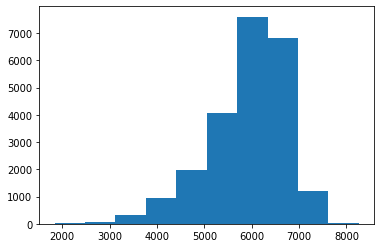

In [182]:
print(data)

## Sobol analysis

In [176]:
Si_winner = sobol.analyze(problem, data['Winner'].values, print_to_console=True)

                           ST   ST_conf
pull_of_parties      0.824281  0.064633
radius               1.007154  0.072485
pull_of_connections  0.823903  0.063670
alpha                0.805778  0.060656
b                    0.808843  0.059257
                           S1   S1_conf
pull_of_parties      0.015519  0.055861
radius               0.133862  0.067029
pull_of_connections  0.032671  0.053537
alpha                0.011050  0.059075
b                   -0.037446  0.058702
                                              S2   S2_conf
(pull_of_parties, radius)              -0.043956  0.084475
(pull_of_parties, pull_of_connections) -0.018692  0.075016
(pull_of_parties, alpha)               -0.026468  0.085462
(pull_of_parties, b)                    0.059469  0.079069
(radius, pull_of_connections)          -0.012545  0.082512
(radius, alpha)                        -0.035845  0.088489
(radius, b)                             0.025120  0.083296
(pull_of_connections, alpha)           -0.012382

## Creating a plotting function

In [177]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

## Plotting the results of the Sensitivity analysis

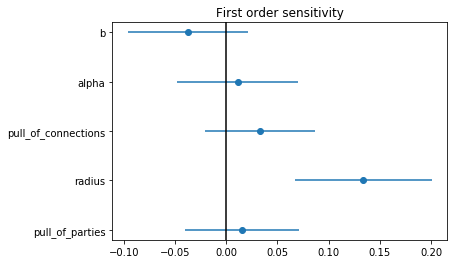

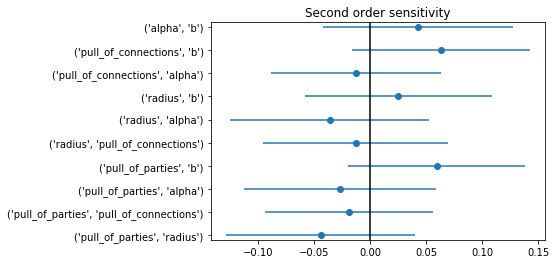

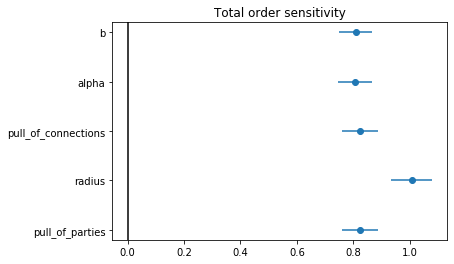

<Figure size 432x288 with 0 Axes>

In [180]:
plot_index(Si_winner, problem['names'], '1', 'First order sensitivity')
plt.show()

# Second order
plot_index(Si_winner, problem['names'], '2', 'Second order sensitivity')
plt.show()

# Total order
plot_index(Si_winner, problem['names'], 'T', 'Total order sensitivity')
plt.show()
plt.savefig('sensitivity_plot.png')